In [52]:
import jax.numpy as jnp
import project_2 as p2
import seaborn as sns
from tqdm import tqdm
import imp
imp.reload(p2)
sns.set(context='paper',style='ticks')

# Problem setup:

## States:

$$
x(t) = \left[ 
        \Re\{\bar{V}_1(t)\},
        \Im\{\bar{V}_1(t)\},
        c_g(t),
        s_g(t),
        \delta_g(t),
        \omega_g(t),
        \Re\{\bar{V}_2(t)\},
        \Im\{\bar{V}_2(t)\},
        c_m(t),
        s_m(t),
        \delta_m(t),
        \omega_m(t)
    \right]^T
$$

## System Parameters and Initial Conditions:

In [74]:
#Initial conditions
Ig = 0.75 * jnp.exp(jnp.deg2rad(180)*1j)
Eg = 1.0315 * jnp.exp(jnp.deg2rad(14.2)*1j)
Im = 0.75 #* np.exp(0*1j)
Em = 1/(p2.bm*-1j)*(-1*Im) +1
Pgm = 0.75
Pmm = 0.75
V1 = 1/(p2.b*-1j)*Im + 1
V2 = 1.0*jnp.exp(0*1j)

#Parameters that were not stated anywhere in the project.
omega0 = 2*jnp.pi*60


## Measurements 

In [155]:
measurements  = jnp.array([[1.000, 0.100, 1.000, 0.000, 0.750, 0.000, -0.750, 0.000,-0.750, 0.000, 0.750, 0.000, 0.000, 0.000],
                          [1.000, 0.100, 1.000, 0.000, 0.750, 0.000, -0.750, 0.000, -0.750, 0.000, 0.750, 0.000, 0.000, 0.000,],
                          [0.993, 0.030, 0.987, -0.114, 1.079, -0.041, -1.079, 0.041, -1.079, 0.041, 0.141, 0.068, -0.392, -1.092],
                          [0.991, 0.013, 0.983, -0.135, 1.111, -0.060, -1.111, 0.060, -1.111, 0.060, 0.177, 0.068, -0.811, -2.146],
                          [0.988, -0.014, 0.975, -0.169, 1.160, -0.095, -1.160, 0.095,-1.160, 0.095, 0.233, 0.065, -1.278, -3.125],
                          [0.982, -0.052, 0.963, -0.215, 1.219, -0.148, -1.219, 0.148,-1.219, 0.148, 0.305, 0.056, -1.813, -4.001],
                          [0.974, -0.101, 0.944, -0.271, 1.281, -0.222, -1.281, 0.222, -1.281, 0.222, 0.384, 0.036, -2.425, -4.757],
                          [0.960, -0.159, 0.918, -0.337, 1.335, -0.318, -1.335, 0.318, -1.335, 0.318, 0.464, 0.002, -3.118, -5.387],
                          [0.941, -0.226, 0.883, -0.409, 1.372, -0.436, -1.372, 0.436, -1.372, 0.436, 0.534, -0.047, -3.888, -5.896],
                          [0.915, -0.302, 0.838, -0.487, 1.382, -0.572, -1.382, 0.572, -1.382, 0.572, 0.586, -0.110, -4.723, -6.300],
                          [0.916, -0.334, 0.844, -0.482, 1.106, -0.538, -1.106, 0.538, -1.106, 0.538, 1.106, -0.538, -5.609, -6.622],
                          [0.877, -0.424, 0.790, -0.565, 1.055, -0.652, -1.055, 0.652, -1.055, 0.652, 1.055, -0.652, -6.175, -5.836],
                          [0.832, -0.512, 0.734, -0.640, 0.959, -0.735, -0.959, 0.735, -0.959, 0.735, 0.959, -0.735, -6.730, -5.067],
                          [0.780, -0.597, 0.676, -0.707, 0.828, -0.778, -0.828, 0.778, -0.828, 0.778, 0.828, -0.778, -7.226, -4.377]
                         ])

In [156]:
P = 10e6*jnp.eye(8)
W = (1/(0.01**2))*jnp.eye(measurements.shape[1])

## Dynamic State Estimation

In [157]:
x_k = jnp.array([jnp.real(V1),jnp.imag(V1),jnp.cos(jnp.angle(Eg)),jnp.sin(jnp.angle(Eg)),jnp.angle(Eg),0,jnp.real(V2),jnp.imag(V2),jnp.cos(jnp.angle(Em)),jnp.sin(jnp.angle(Em)),jnp.angle(Em),0])
print(x_k)

[ 1.          0.1         0.96944535  0.2453074   0.24783677  0.
  1.          0.          0.99174285 -0.12824261 -0.12859675  0.        ]


In [158]:
X = []
tol = 1e-6
k = 0
x_t_h = x_k

In [159]:
print(p2.g_cons(x_k,x_t_h))

[-2.0358711e-06  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -9.3132257e-10  0.0000000e+00  0.0000000e+00  0.0000000e+00]


In [160]:
jnp.abs(p2.Em)

DeviceArray(1.0083259, dtype=float32, weak_type=True)

In [161]:
g = p2.g_cons(x_k,x_t_h)
print(g)

[-2.0358711e-06  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -9.3132257e-10  0.0000000e+00  0.0000000e+00  0.0000000e+00]


In [162]:
x_k

DeviceArray([ 1.        ,  0.1       ,  0.96944535,  0.2453074 ,
              0.24783677,  0.        ,  1.        ,  0.        ,
              0.99174285, -0.12824261, -0.12859675,  0.        ],            dtype=float32)

In [163]:
def d_vec(x_k,x_t_h,z):
    h_x = p2.h(x_k)-z
    g_x_k = p2.g_cons(x_k,x_t_h)
    d = jnp.concatenate([h_x,g_x_k])
    return d

def update_rule(x_k,H,G,W,P,d):
    left = jnp.linalg.inv(jnp.vstack([H,G]).T @ jnp.block([[W,jnp.zeros((14,8))],[jnp.zeros((8,14)),P]])@jnp.vstack([H,G]))
    right = (jnp.vstack([H,G]).T@jnp.block([[W,jnp.zeros((14,8))],[jnp.zeros((8,14)),P]]))@d
    x_k_1 = x_k - left @ right
    #x_k_1 = x_k - jnp.linalg.inv(H.T@W@H + G.T@P@G)@(jnp.hstack([H.T@W,G.T@P]))@d
    return x_k_1


In [164]:
residuals = []
stds = []
for t,z in enumerate(measurements):
    print("==============================t= ",t)
    for i in tqdm(range(10)):
        H = p2.measurement_jacobian(x_k)
        G = p2.constraint_jacobian(x_k,x_t_h)
        d = d_vec(x_k,x_t_h,z)
        x_k = update_rule(x_k,H,G,W,P,d)
    print(x_k)
    #Save residuals and standard deviations
    stds.append(std(H,G,W,P))
    residuals.append(p2.h(x_k)-z)
    X.append(x_k)
    x_t_h = x_k

  0%|          | 0/10 [00:00<?, ?it/s]

==============================t=  0


  0%|          | 0/10 [00:00<?, ?it/s]

[ 9.9999231e-01  9.9986903e-02  9.6944553e-01  2.4530794e-01
  2.4783693e-01  1.9757857e-05  9.9999410e-01 -9.9646168e-06
  9.9174267e-01 -1.2824301e-01 -1.2859681e-01 -7.1563450e-06]
==============================t=  1


  0%|          | 0/10 [00:00<?, ?it/s]

[ 9.9999231e-01  9.9987462e-02  9.6944565e-01  2.4530861e-01
  2.4783725e-01  1.7214676e-05  9.9999410e-01 -9.4963370e-06
  9.9174243e-01 -1.2824351e-01 -1.2859698e-01 -1.1627775e-05]
==============================t=  2


  0%|          | 0/10 [00:00<?, ?it/s]

[ 0.9924401   0.02509517  0.97018456  0.24232101  0.24478956 -0.36573946
  0.98679966 -0.1190827   0.99057966 -0.1368582  -0.13732922 -1.0478578 ]
==============================t=  3


  0%|          | 0/10 [00:00<?, ?it/s]

[ 0.9909758   0.01355491  0.97250694  0.23281603  0.23499699 -0.80936825
  0.98298216 -0.13450064  0.986548   -0.16316095 -0.16393293 -2.144587  ]
==============================t=  4


  0%|          | 0/10 [00:00<?, ?it/s]

[ 0.9878794  -0.01363195  0.9764006   0.21587582  0.217604   -1.2777901
  0.9752344  -0.16820079  0.9783744  -0.20630571 -0.20784707 -3.125109  ]
==============================t=  5


  0%|          | 0/10 [00:00<?, ?it/s]

[ 0.9823981  -0.05159687  0.9816181   0.1906738   0.19185168 -1.8124887
  0.96267945 -0.21400908  0.9643387  -0.2639891  -0.26723382 -4.0013    ]
==============================t=  6


  0%|          | 0/10 [00:00<?, ?it/s]

[ 0.9736307  -0.09998571  0.9877097   0.15592088  0.15654543 -2.4242601
  0.94404894 -0.2706296   0.94245636 -0.33357248 -0.34022355 -4.757468  ]
==============================t=  7


  0%|          | 0/10 [00:00<?, ?it/s]

[ 0.9603852  -0.15809885  0.99381363  0.11018548  0.11036914 -3.1168945
  0.9180204  -0.33591637  0.9108724  -0.41190937 -0.42476615 -5.387643  ]
==============================t=  8


  0%|          | 0/10 [00:00<?, ?it/s]

[ 0.94131625 -0.22551773  0.9984949   0.0520673   0.05200795 -3.8864467
  0.8832573  -0.40824306  0.8681385  -0.4955505  -0.5188034  -5.8968267 ]
==============================t=  9


  0%|          | 0/10 [00:00<?, ?it/s]

[ 0.9148999  -0.30143437  0.9995915  -0.01957173 -0.01972309 -4.7212787
  0.83875084 -0.48548362  0.8133627  -0.58100796 -0.6204522  -6.3010316 ]
==============================t=  10


  0%|          | 0/10 [00:00<?, ?it/s]

[ 0.9142993  -0.33711663  0.9941263  -0.10516617 -0.10559543 -5.583401
  0.8423189  -0.4845155   0.7464651  -0.66469485 -0.7277992  -6.580605  ]
==============================t=  11


  0%|          | 0/10 [00:00<?, ?it/s]

[ 0.87782615 -0.422894    0.97904307 -0.20176822 -0.20354907 -6.1710343
  0.79113233 -0.5633331   0.67392725 -0.7382867  -0.83127475 -5.836464  ]
==============================t=  12


  0%|          | 0/10 [00:00<?, ?it/s]

[ 0.8328995  -0.51047426  0.9517331  -0.30549592 -0.31103545 -6.7273316
  0.7351796  -0.6381841   0.6042219  -0.79646015 -0.9221519  -5.0687947 ]
==============================t=  13


100%|██████████| 10/10 [00:02<00:00,  4.01it/s]

[ 0.78099406 -0.59563833  0.9098865  -0.4136748  -0.4272954  -7.2238584
  0.6775513  -0.70596474  0.5397515  -0.8415659  -1.0008816  -4.3787637 ]


In [165]:
d

DeviceArray([ 9.9408627e-04,  1.3616681e-03,  1.5513301e-03,
              1.0352731e-03, -5.5193901e-04,  2.1795034e-03,
              5.5193901e-04, -2.1795034e-03,  2.2929907e-04,
             -5.9860945e-03, -8.7368488e-04,  4.8260689e-03,
              2.1414757e-03, -1.7638206e-03, -1.4885515e-04,
             -1.1175871e-08,  3.3332966e-05,  8.1285834e-06,
              1.5523285e-04,  2.6077032e-08, -3.2961369e-05,
             -1.1648983e-05], dtype=float32)

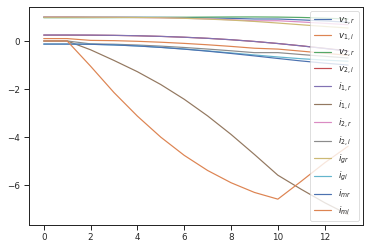

In [166]:
import matplotlib.pyplot as plt
X = jnp.asarray(X)
names = ['$v_{1,r}$','$v_{1,i}$','$v_{2,r}$','$v_{2,i}$','$i_{1,r}$','$i_{1,i}$','$i_{2,r}$','$i_{2,i}$','$i_{gr}$','$i_{gi}$','$i_{mr}$','$i_{mi}$','$\omega_g$','$\omega_m$']
for i in range(12):
    name = names[i]
    plt.plot(X[:,i],label=name)
plt.legend()

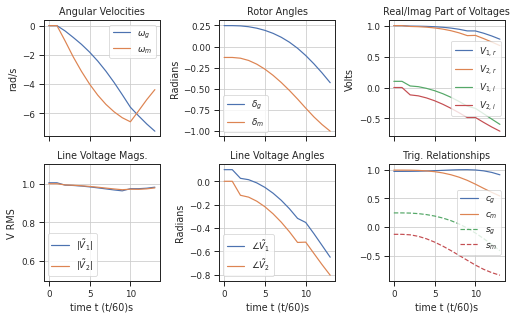

In [188]:
figscale = 2
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(figscale*3.5,figscale*3.5/1.61828),constrained_layout=True,sharex=True)
axes[1,0].set_xlabel("time t (t/60)s")
axes[1,1].set_xlabel("time t (t/60)s")
axes[1,2].set_xlabel("time t (t/60)s")


#Generator and motor speed
axes[0,0].plot([p2.omegag(x) for x in X],label="$\omega_g$")
axes[0,0].plot([p2.omegam(x) for x in X],label="$\omega_m$")
axes[0,0].legend()
axes[0,0].set_title("Angular Velocities")
axes[0,0].set_ylabel("rad/s")
axes[0,0].grid()

#Deltas
axes[0,1].plot([p2.deltag(x) for x in X],label="$\delta_g$")
axes[0,1].plot([p2.deltam(x) for x in X],label="$\delta_m$")
axes[0,1].legend()
axes[0,1].set_title("Rotor Angles")
axes[0,1].set_ylabel("Radians")
axes[0,1].grid()

#Voltages
axes[0,2].plot([p2.v1r(x) for x in X],label="$V_{1,r}$")
axes[0,2].plot([p2.v2r(x) for x in X],label="$V_{2,r}$")
axes[0,2].plot([p2.v1i(x) for x in X],label="$V_{1,i}$")
axes[0,2].plot([p2.v2i(x) for x in X],label="$V_{2,i}$")
axes[0,2].legend()
axes[0,2].set_title("Real/Imag Part of Voltages")
axes[0,2].set_ylabel("Volts")
axes[0,2].grid()

#Voltage mags
axes[1,0].plot([jnp.abs(p2.v1r(x) + p2.v1i(x)*1j) for x in X],label=r"$|\tilde{V}_1|$")
axes[1,0].plot([jnp.abs(p2.v2r(x) + p2.v2i(x)*1j) for x in X],label=r"$|\tilde{V}_{2}|$")
axes[1,0].set_ylabel("V RMS")
axes[1,0].set_title("Line Voltage Mags.")
axes[1,0].set_ylim(0.5,1.1)
axes[1,0].legend()
axes[1,0].grid()

#Voltage angles
axes[1,1].plot([jnp.angle(p2.v1r(x) + p2.v1i(x)*1j) for x in X],label=r"$\angle\tilde{V}_1$")
axes[1,1].plot([jnp.angle(p2.v2r(x) + p2.v2i(x)*1j)for x in X],label=r"$\angle\tilde{V}_{2}$")
axes[1,1].set_ylabel("Radians")
axes[1,1].legend()
axes[1,1].grid()
axes[1,1].set_title("Line Voltage Angles")


#Voltage angles
axes[1,2].grid()
axes[1,2].plot([p2.cg(x) for x in X],label=r'$c_g$')
axes[1,2].plot([p2.cm(x) for x in X],label=r'$c_m$')
axes[1,2].plot([p2.sg(x) for x in X],'--',label=r'$s_g$')
axes[1,2].plot([p2.sm(x) for x in X],'--',label=r'$s_m$')
axes[1,2].set_title("Trig. Relationships")
axes[1,2].legend()


#save
plt.savefig("Figures/results.png",dpi=400)

In [168]:
import pandas as pd
import numpy as np

STDS = np.asarray(stds)

df = pd.DataFrame()
names = ['$v_{1,r}$','$v_{1,i}$','$c_g$','$s_g$','$\delta_g$','$\omega_g$','$v_{2,r}$','$v_{2,i}$','$c_{m}$','$s_m$','$\delta_m$','$\omega_m$']
stds_list = []
labels = []
for j,s_j in enumerate(STDS.T):
    labels.append([names[j] for i in range(len(s_j))])
    stds_list.append(s_j)

df['Standard Deviation'] = np.asarray(stds).flatten()
df['names'] = np.asarray(labels).flatten()

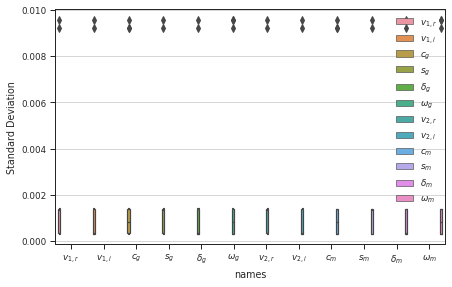

In [192]:
fig,ax = plt.subplots(figsize=(2*3.5,2*3.5/1.61828))
plt.grid()
sns.boxplot(data=df,x='names',y='Standard Deviation',hue='names')
plt.legend(frameon=False)
plt.savefig("Figures/std.png",dpi=400)


In [193]:
from scipy.stats import chi2
def goodness_of_fit(J,df):
    return 1 - chi2.cdf(J,df)

In [ ]:
sns.violinplot(data=df,x='')

In [104]:
def std(H,G,W,P):
    left = jnp.linalg.inv(jnp.vstack([H,G]).T @ jnp.block([[W,jnp.zeros((14,8))],[jnp.zeros((8,14)),P]])@jnp.vstack([H,G]))
    stds = []
    for i,s_i in enumerate(left):
        stds.append(jnp.sqrt(s_i[i]))
    return stds

In [72]:
info_matrix = jnp.linalg.inv(H.T @ W @ H)
stds = []
for i,s_i in enumerate(info_matrix):
    stds.append(jnp.sqrt(s_i[i]))
stds

[DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(nan, dtype=float32),
 DeviceArray(inf, dtype=float32),
 DeviceArray(0.01, dtype=float32)]